# Analyzing Gym Members Exercise Dataset

#### Understanding Fitness Patterns and Performance Across Diverse Gym Experience Levels

**Name:** Muhammad Usman  
**ID:** 100923782


## Introduction:

The Gym Members Exercise Dataset thoroughly examines the fitness habits, physical characteristics, and exercise routines of gym members. Key data like heart rate, calories burned, workout time, and demographics like age, gender, and experience level are included in 973 entries. This dataset is excellent for tracking progress, examining health trends, and researching exercise habits. Health researchers, fitness lovers, and data analysts can benefit.

The dataset was collected from Kaggle and created by Vala Khorasani. It's ideal for investigating the relationships between fitness outcomes and various characteristics, including age and gender. It allows us to explore trends and uncover useful information using both numerical (calories burned, session duration) and categorical (workout type, gender) data.

I chose three questions to focus on, based on my interest in fitness and regular workout habits:

1. **What is the relationship between workout duration and calories burned?**

As someone who exercises frequently, I'm interested in how long workouts should last to burn the most calories. Does putting in more time at the gym always translate into burning more calories, or does there come a time when it doesn't matter? This question stood out because the dataset includes detailed data on session duration and calories burned, making it possible to investigate whether there’s a simple, linear relationship or if other factors come into play. People may find this analysis useful in creating more effective exercise plans.

2. **Are there significant differences in average BPM (beats per minute) between genders during workouts?**

The reason for this question is to determine whether physiological differences between men and women impact heart rate during physical activity. Gender is one of the key demographic variables in the dataset, and with heart rate data like average beats per minute, the dataset provides a clear opportunity to examine this potential difference. Discovering patterns here could aid in developing more effective workout routines for each gender and could be useful for designing personalized fitness programs.

3. **How does workout frequency (days per week) affect fat percentage?**

It's commonly believed that regular exercise is essential to being healthy. This question examines the relationship between weekly exercise frequency and body fat. With variables like workout frequency and fat percentage directly available, the dataset allows for a meaningful exploration of whether exercising more frequently has a consistent, measurable impact on body fat reduction. The objective is to observe the effects of regular exercise on body fat and general health, which could offer practical advice for gym-goers aiming for specific health and fitness goals.

The purpose of this analysis is to offer useful insights about gender-specific trends, the value of consistency, and the effectiveness of workouts. The findings may be useful not just for people who exercise like me but also for researchers and personal trainers creating customized training plans.

![Technogym Treadmill Workout](https://www.technogym.com/wpress/wp-content/uploads/2021/08/FBSocialCard-2.jpg)

*Image source: https://www.technogym.com/gb/newsroom/20-minute-treadmill-workouts-speed/*

## 2. Methods

### 2.1 Data Collection

The Gym Members Exercise Dataset is publicly available on [Kaggle](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset/data) and was created by Vala Khorasani. This dataset is stored as a CSV file and will be loaded using the pandas library. After loading, the structure of the dataset will be inspected to ensure successful import.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('gym_members_exercise_tracking.csv')

### 2.2 Data Cleaning

The Gym Members Exercise Dataset had some unnecessary columns that were removed to focus the analysis on relevant data. Missing values were also dropped to ensure a complete and accurate dataset. The dataset is now prepared for further exploration and analysis.

In [3]:
# Check the structure of the dataset
data.info()

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Drop unnecessary columns
columns_to_drop = ['Water_Intake (liters)', 'Weight (kg)', 'Height (m)', 'BMI']
data = data.drop(columns=columns_to_drop)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

## Exploratory Data Analysis

In this section, I will explore the relationships between key variables in the Gym Members Exercise Dataset to address the following questions:

1. What is the relationship between workout duration and calories burned?
2. Are there significant differences in average BPM between genders during workouts?
3. How does workout frequency (days per week) affect fat percentage?

To asnwer these questions, I will generate visualizations and conduct basic statistical analyses.

### **Question 1:** What is the relationship between workout duration and calories burned?

To understand how workout duration affects calories burned, we use a scatter plot to visualize the relationship. A correlation analysis is performed to measure the strength and direction of this relationship. This helps determine if longer workouts lead to burning more calories.

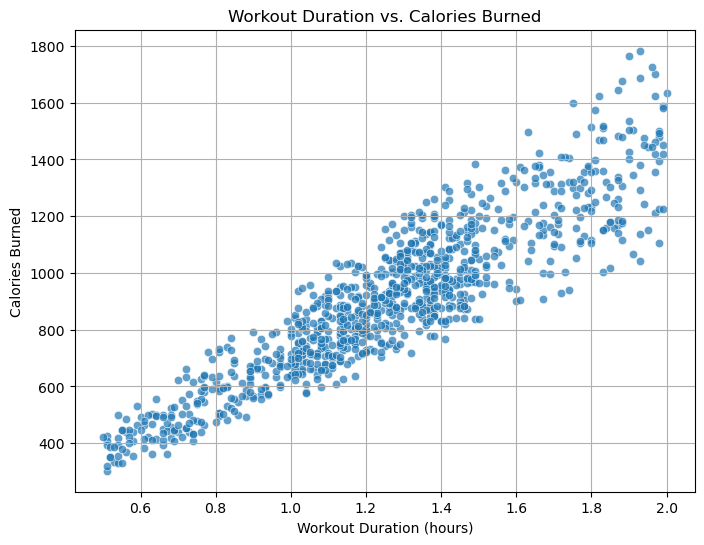

Correlation coefficient: 0.91
P-value: 0.0000
There is a strong relationship between workout duration and calories burned.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Scatter plot of Workout Duration vs Calories Burned
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Session_Duration (hours)', y='Calories_Burned', alpha=0.7)
plt.title('Workout Duration vs. Calories Burned')
plt.xlabel('Workout Duration (hours)')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
duration = data['Session_Duration (hours)']
calories = data['Calories_Burned']
correlation, p_value = pearsonr(duration, calories)

print(f"Correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of Results
if abs(correlation) > 0.7:
    print("There is a strong relationship between workout duration and calories burned.")
elif 0.3 < abs(correlation) <= 0.7:
    print("There is a moderate relationship between workout duration and calories burned.")
else:
    print("There is a weak or no relationship between workout duration and calories burned.")

The scatter plot shows that longer workout durations are linked to higher calories burned. The correlation coefficient of 0.91 indicates a strong positive relationship. This means that as workout time increases, calorie burn tends to increase too.

This association is statistically significant, as indicated by the p-value of 0, which makes it unlikely to be the result of chance. But the association also raises the possibility that other variables, such as the intensity of the workout, may also have an impact on calorie burn.

This analysis emphasizes how working out for longer periods of time can help burn more calories. However, highlights that other factors should also be considered to get the full picture.

#### **Question 2:** Are there significant differences in average BPM (beats per minute) between genders during workouts?

To explore whether average beats per minute during workouts differs between males and females, I use a box plot to visualize the distributions. A t-test is then performed to measure the statistical significance of the differences. This helps determine if gender influences heart rate performance during exercise.

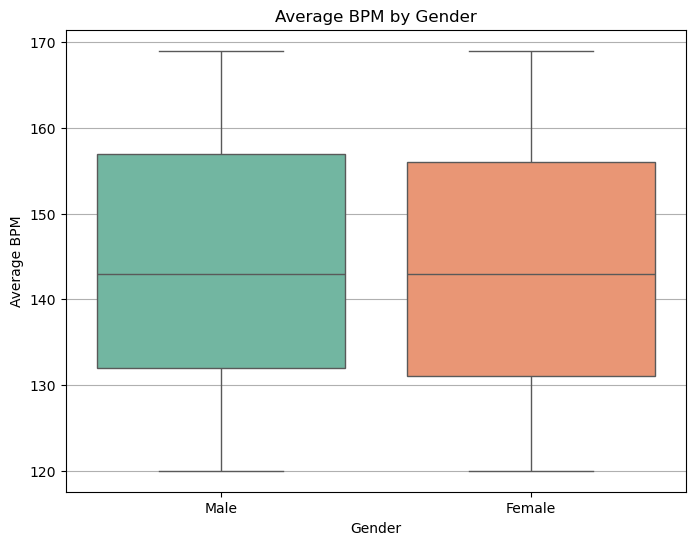

T-test statistic: 0.30
P-value: 0.7637
The difference in Average BPM between males and females is not statistically significant.


In [14]:
# Import necessary library for statistical testing
from scipy.stats import ttest_ind

# Box plot for Average BPM by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Gender', y='Avg_BPM', hue='Gender', dodge=False, palette='Set2', legend=False)
plt.title('Average BPM by Gender')
plt.xlabel('Gender')
plt.ylabel('Average BPM')
plt.grid(True, axis='y')
plt.legend([],[], frameon=False)  # Remove the unnecessary legend
plt.show()

# Perform a t-test to compare Average BPM between genders
# Extract BPM values for males and females
male_bpm = data[data['Gender'] == 'Male']['Avg_BPM']
female_bpm = data[data['Gender'] == 'Female']['Avg_BPM']

# Perform the t-test
t_stat, p_value = ttest_ind(male_bpm, female_bpm)

# Print results with explanation
print(f"T-test statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in Average BPM between males and females is statistically significant.")
else:
    print("The difference in Average BPM between males and females is not statistically significant.")


As we know, the box plot displays the distribution of the average heart rate for both men and women. The overlapping ranges and the close median values for both genders suggest that the gap is not significant.

The t-test confirms this finding, indicating that the difference is not statistically significant with a p-value of 0.7637. This means gender does not play a major role in determining average BPM during workouts.

These results imply that rather than gender, other variables, such as workout intensity or personal fitness level, likely have an impact on heart rate during exercise. Workout plans don't need to be significantly modified to account for variations in heart rates by gender.

#### **Question 3:** How does workout frequency (days per week) affect fat percentage?

A bar graph shows the average fat percentage for workout frequencies from 1 to 7 days per week. While data is only available for 2–5 days, all 7 days are included for completeness. An ANOVA test checks if the differences in fat percentage across 2–5 days are statistically significant. This helps us understand how regular exercise affects body fat.

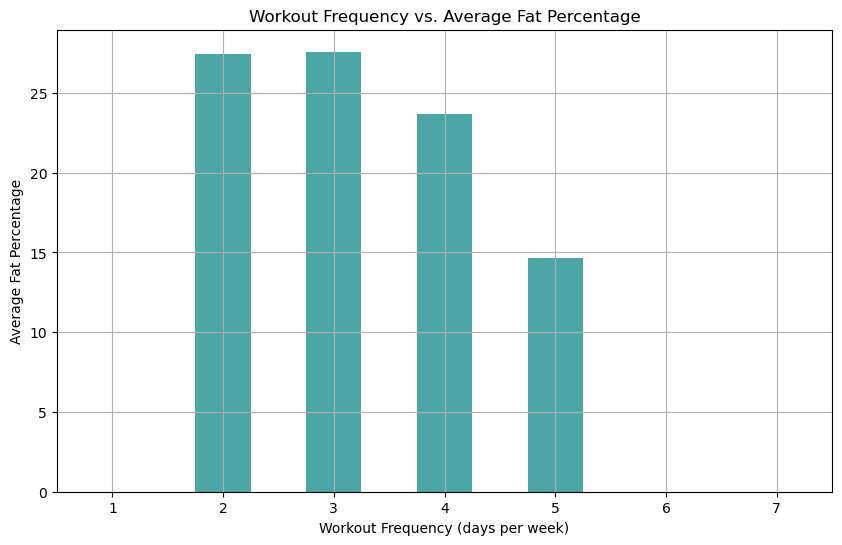

Average Fat Percentage by Workout Frequency:
1 days/week: No data
2 days/week: 27.44
3 days/week: 27.59
4 days/week: 23.69
5 days/week: 14.66
6 days/week: No data
7 days/week: No data

The differences in fat percentage across workout frequencies are statistically significant (F-statistic = 211.52, p-value = 0.0000).


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import numpy as np

# Create a complete list of frequencies (1 to 7 days)
all_frequencies = np.arange(1, 8)

# Calculate average fat percentage for each frequency (fill missing with NaN)
fat_by_frequency = data.groupby('Workout_Frequency')['Fat_Percentage'].mean()
fat_by_frequency = fat_by_frequency.reindex(all_frequencies, fill_value=np.nan)

# Create a bar graph
plt.figure(figsize=(10, 6))
fat_by_frequency.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Workout Frequency vs. Average Fat Percentage')
plt.xlabel('Workout Frequency (days per week)')
plt.ylabel('Average Fat Percentage')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

# Perform ANOVA test for statistical significance (only for data available: 2–5 days)
freq_2 = data[data['Workout_Frequency'] == 2]['Fat_Percentage']
freq_3 = data[data['Workout_Frequency'] == 3]['Fat_Percentage']
freq_4 = data[data['Workout_Frequency'] == 4]['Fat_Percentage']
freq_5 = data[data['Workout_Frequency'] == 5]['Fat_Percentage']

anova_result = f_oneway(freq_2, freq_3, freq_4, freq_5)

# Output Results
print("Average Fat Percentage by Workout Frequency:")
for freq in all_frequencies:
    if np.isnan(fat_by_frequency[freq]):
        print(f"{freq} days/week: No data")
    else:
        print(f"{freq} days/week: {fat_by_frequency[freq]:.2f}")

if anova_result.pvalue < 0.05:
    print("\nThe differences in fat percentage across workout frequencies are statistically significant "
          f"(F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}).")
else:
    print("\nThe differences in fat percentage across workout frequencies are not statistically significant "
          f"(F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}).")

The bar plot shows the average fat percentage for workout frequencies from 1 to 7 days per week. The data is only available for 2 to 5 days, and it shows that higher workout frequency leads to lower fat percentage. For example, people working out 5 days per week have a much lower fat percentage at 14.66% compared to those working out 2 or 3 days, who have a 27.44% and 27.59% body fat percentage, respectively.

The ANOVA test found that the differences in fat percentage are statistically significant, with an F-statistic of 211.52 and a p-value of 0. This means workout frequency has a big effect on body fat.

These results show that exercising more often can help lower body fat, however, other things like workout intensity or diet might can also play a role.

## Discussion

For this assignment, I examined the Gym Members Exercise Dataset to find trends in exercise routines and how they affect fitness outcome. My focus were these three topics: the relationship between workout duration and calories burned, differences in average BPM between genders during workouts, and the effect of workout frequency on fat percentage.

Let's review each question now. Firstly, we concluded longer workouts result in increased calorie burn, as shown by the first analysis's strong positive association between workout time and calories burned. However, other variables, including the intensity of the workout, might also affect this link. In regards to the second analysis, Males and females did not significantly differ in their average heart rates during exercise. This implies that while individual fitness levels or workout intensity may have an impact on average BPM during exercise, gender alone may not. Finally, the third analysis of workout frequency revealed that lower body fat percentages are linked to higher workout frequencies, for example, five days per week had a significantly lower body fat percentage. The significance of regular exercise in lowering body fat was also emphasized by the ANOVA test, which verified that these differences were statistically significant.

Overall, this analysis demonstrates the advantages of regular physical activity and lengthier exercises to improve overall fitness. On the other hand, things like diet and exercise intensity could also be important to take into account. Trainers and gym-goers like myself can use these results to create a more effective fitness program and overall learn. 

## References

1. Source data - https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset/data
2. Pandas - for data manipulation and cleaning
3. Seaborn - for data visualization (box plots, bar plots, and scatter plots)
4. Matplotlib - for creating custom visualizations
5. Scipy - for statistical tests and correlation analysis (Pearson correlation, ANOVA, t-tests)